<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# ANALISIS EXPLORATORIO DE DATOS

## IMPORTAR ARCHIVOS

In [1]:
import pandas as pd

trips= pd.read_csv('/datasets/project_sql_result_01.csv')
trips_chicago= pd.read_csv('/datasets/project_sql_result_04.csv')
trip_Loop_OHare= pd.read_csv('/datasets/project_sql_result_07.csv')

## ESTUDIO DE DATOS

In [ ]:
print(trips)
trips.info()

                       company_name  trips_amount
0                         Flash Cab         19558
1         Taxi Affiliation Services         11422
2                 Medallion Leasing         10367
3                        Yellow Cab          9888
4   Taxi Affiliation Service Yellow          9299
..                              ...           ...
59     4053 - 40193 Adwar H. Nikola             7
60          2733 - 74600 Benny Jona             7
61    5874 - 73628 Sergey Cab Corp.             5
62       2241 - 44667 - Felman Corp             3
63      3556 - 36214 RC Andrews Cab             2

[64 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
print(trips_chicago)
trips_chicago.info()

   dropoff_location_name  average_trips
0                   Loop   10727.466667
1            River North    9523.666667
2          Streeterville    6664.666667
3              West Loop    5163.666667
4                 O'Hare    2546.900000
..                   ...            ...
89       Mount Greenwood       3.137931
90             Hegewisch       3.117647
91              Burnside       2.333333
92             East Side       1.961538
93             Riverdale       1.800000

[94 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [ ]:
print(trip_Loop_OHare)
trip_Loop_OHare.info()

                 start_ts weather_conditions  duration_seconds
0     2017-11-25 16:00:00               Good            2410.0
1     2017-11-25 14:00:00               Good            1920.0
2     2017-11-25 12:00:00               Good            1543.0
3     2017-11-04 10:00:00               Good            2512.0
4     2017-11-11 07:00:00               Good            1440.0
...                   ...                ...               ...
1063  2017-11-25 11:00:00               Good               0.0
1064  2017-11-11 10:00:00               Good            1318.0
1065  2017-11-11 13:00:00               Good            2100.0
1066  2017-11-11 08:00:00               Good            1380.0
1067  2017-11-04 16:00:00                Bad            2834.0

[1068 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts  

**Los tipos de datos se encuentran correctos, no hay datos repetidos y ni datos ausentes, por lo tanto podemos contunuar con el analisis de los datos**

## 10 PRINCIPALES BARRIOS EN TERMINOS DE FINALIZACION DEL RECORRIDO

In [ ]:
top_10_neighbohood=trips_chicago.head(10) # En esta caso la tabla esta ordenada de mayor a menor por el promedio de viajes
# si la tabla no estuviera ordenada, el siguiente metodo daria el mismo resultado
trips_chicago.query("average_trips>1250")

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


## GRAFICOS

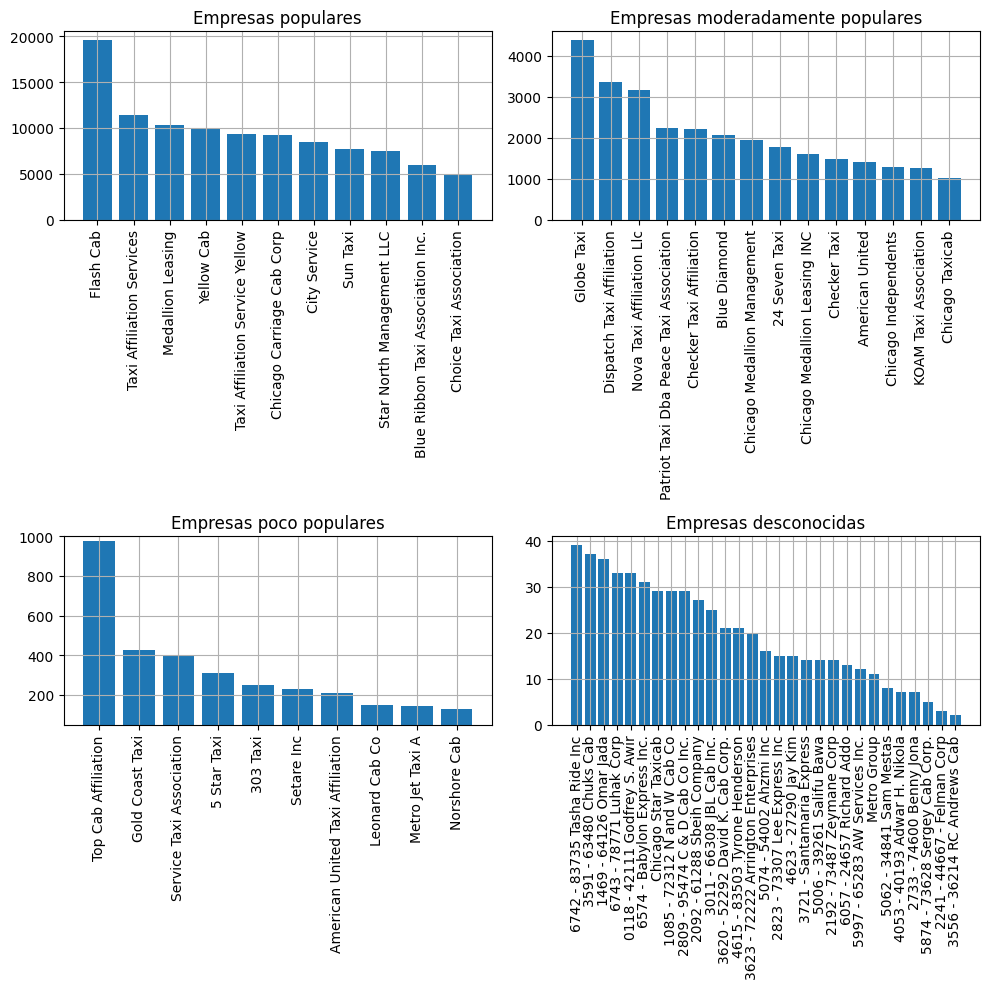

In [ ]:
from matplotlib import pyplot as plt

hight_trips=trips.query('trips_amount>=5000')
medium_trips=trips.query('5000>trips_amount>=1000')
low_trips=trips.query('1000>trips_amount>=100')
insignificant_trips=trips.query('100>trips_amount')

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

plt.subplot(2,2,1)
plt.bar(hight_trips['company_name'],hight_trips['trips_amount'])
plt.title('Empresas populares')
plt.xticks(rotation=90)
plt.grid()

plt.subplot(2,2,2)
plt.bar(medium_trips['company_name'],medium_trips['trips_amount'])
plt.title('Empresas moderadamente populares')
plt.xticks(rotation=90)
plt.grid()

plt.subplot(2,2,3)
plt.bar(low_trips['company_name'],low_trips['trips_amount'])
plt.title('Empresas poco populares')
plt.xticks(rotation=90)
plt.ylim(50,1000)
plt.grid()

plt.subplot(2,2,4)
plt.bar(insignificant_trips['company_name'],insignificant_trips['trips_amount'])
plt.title('Empresas desconocidas')
plt.xticks(rotation=90)
plt.grid()

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Excelente!<br/>

Buena manera de mostrar las compañías de taxis de una manera bastante ordenada, dandole importancia a cada uno de los sectores
</div>

**Para la tabla con los nombres de las empresas de taxis y numero de viajes, la clasifique en 4 graficos para poder observar mejor su comportamiento. El primer grafico con las empresas mas populares que tiene viajes entre 20,000 mil a 5,000 mil, el segundo grafico con empresas moderadamente populares que tiene viajes entre 4,500 mil a 1,000 mil, el tercer grafico con empresas poco populares que tiene viajes entre 990 a 100 y por ultimo el grafico con las empresas practicamente nulas que no alcanzan ni los 40 viajes**

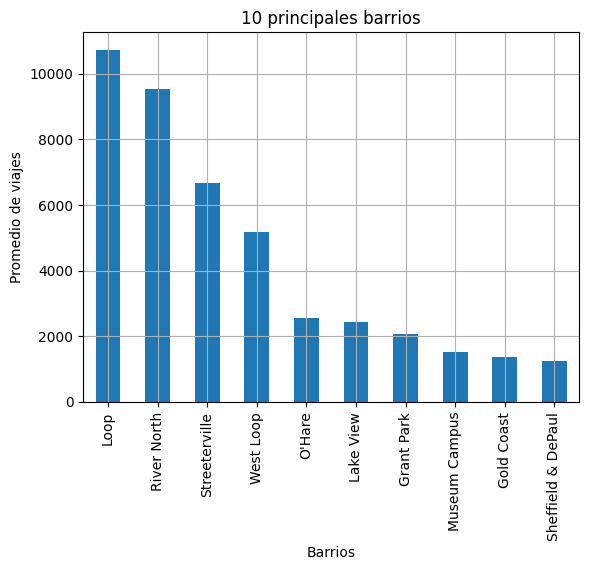

In [ ]:
top_10_neighbohood.plot(kind='bar',
                        x='dropoff_location_name',
                        y='average_trips',
                        xlabel='Barrios',
                        ylabel='Promedio de viajes',
                        grid=True,
                        title='10 principales barrios',
                        legend=False)
plt.show()

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Correcto!<br/>

Buena manera de crear una grafica que nos muestra los lugares más frecuentados
</div>

**En este grafico se puede observar los 10 barrios principales, con esta grafica podemos concluir que la gente viaja mas a los barrios Loop y River North, despues hay un baja de casi 3,000 viajes promedio para el barrio Streeterville y asi va bajando drasticamente hasta llegar con los barrios Museum Campus, Gold Coast y Sheffield & DePaul**

# PRUEBA DE HIPOTESIS

**HIPOTESIS NULA:** La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare es igual a la de los sábados lluviosos

**HIPOTESIS ALTERNATIVA:** La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia en sábados lluviosos

**NIVEL DE SIGNIFICACION:** 0.05

**Cómo planteaste las hipótesis nula y alternativa:** Planteé la hipotesis nula como la igualdad de dos poblaciones diferentes, en este caso el promedio de viajes en dias lluviosos y en dias no lluviosos y la hipótesis alternativa siempre sera lo contrario de la hipotesis nula.

In [ ]:
#Prueba la hipótesis:
from scipy import stats as st

trip_Loop_OHare_rain=trip_Loop_OHare.query("weather_conditions== 'Bad'")
trip_Loop_OHare_no_rain=trip_Loop_OHare.query("weather_conditions== 'Good'")

alpha =0.05

results= st.ttest_ind(trip_Loop_OHare_rain['duration_seconds'],trip_Loop_OHare_no_rain['duration_seconds'])

print('valor p:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos")
else:
    print("No podemos rechazar la hipótesis nula: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos")


valor p: 6.517970327099473e-12
Rechazamos la hipótesis nula: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos


<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class="tocSkip"></a><br>

Bien hecho!<br/>

Es correcto rechazar la hipotesis nula, debido a que sí hay notables cambios entre un día de buenas condiciones y uno con malas condiciones
</div>

**Qué criterio usaste para probar las hipótesis y por qué**
Use el criterio de igualdad de dos poblaciones con la funcion scipy.stats.ttest_ind porque esta funcion opera con dos poblaciones diferentes que es el caso.

# Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso, los procedimientos realizados son correctos, este es un ejercicio que nos ayuda a entender y comprobar las hipotesis con procesos estadisticos.<br/>    
<br/>    
Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!
</div>


<div class="alert alert-block alert-success">
<b>Aspectos positivos del proyecto</b> <a class="tocSkip"></a><br />

- Las observaciones intermedias me parecen buenas
- Las graficas utilizadas me parecen del tipo correcto
- El proyecto esta ordenado
- El proyecto es corto y conciso    
    
</div>

<div class="alert alert-block alert-warning">
<b>Aspectos que pueden mejorar del proyecto</b> <a class="tocSkip"></a><br />

- Desarrollar las conclusiones finales, puedes añadir lo que te pareció complicado del proyecto, que mejoras se pueden hacer, etc.

</div>

